# Analysis Bike Share

# Summary
* 85% of the trips are made by users who are subscribers for the last two years (2013-08, 2015-08).
* This trend has been maintained for the last couple of months (86% are subscribers).
* The number of trips is variable through the days. Last couple of months follow the same trends.
* Subscribers: Average number of trips per day 773. Average number of trips per day (Last couple of months) 900.
* Subscribers use bikes more on weekdays. There is a big difference between weekdays and weekend.
* The Subscriber uses the bike in a greater frequency during rush hours. Morning: 7:00 AM - 9:00 AM. Evening: 16:00 AM - 18:00 AM.
* Average number of trips during the weekday: 105.076 Average number of trips during the weekend: 20.682
* The subscripter use the bike 8 minutes in average. The most frequently used range is between: [2, 15] minutes.
* The most frequent start station is: San Francisco Caltrain (Townsend at 4th).
* The most frequent end station is:  San Francisco Caltrain (Townsend at 4th).
* Trip start-end most used: San Francisco Caltrain 2 (330 Townsend) --> Townsend at 7th (6216 Trips)
* Some bikes are used in a greater frequency.

## User Experience

* According to the data, the user's profile is a worker. He leaves his house in the morning for a station to get on a bike and go to his work (nearest station). This time on average is 8 minutes (not long distance). For the return it is the same idea.
* The user experience can be affected mainly for 2 reasons.
* 1. Limited availability of bikes at rush hours.
* 2. Bikes damaged by excessive use in the stations where there is more demand.


## Experimentation Plan

* Go to the route with the most demand (San Francisco Caltrain 2 (330 Townsend) --> Townsend at 7th) and see what is happening.
* Try to quantify waiting for available bikes at the rush hours. This situation must be equal in all days of the weekday.
* Based on the above, increase the supply of bikes. This must be dynamic according to the demand at the rush hours.
* Detect the most used bikes (bike_id) and check their status.
* Based on the above, implement maintenance (dynamic) according to use.

# Modules

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Load Data

In [5]:
trip = pd.read_csv('trip.csv')

# Subscription Types (Users)

85% of the trips are made by users who are subscribers (use subscription plan)


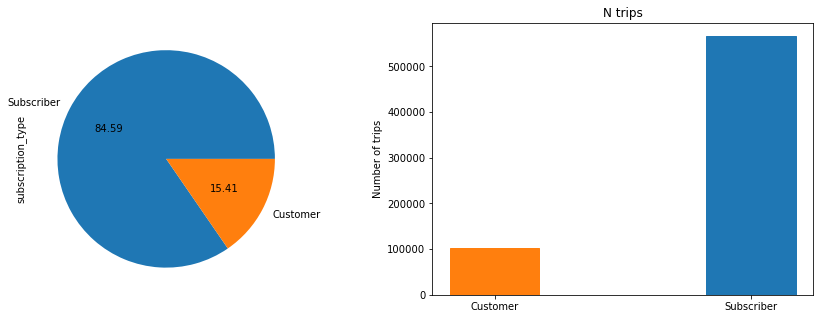

In [6]:
trip['subscription_type'] = pd.Categorical(trip['subscription_type'])
fig, ax = plt.subplots(1, 2, figsize=(15,5))
trip['subscription_type'].value_counts().plot(kind='pie', autopct='%.2f', ax=ax[0])
stats = trip['subscription_type'].value_counts(dropna=True)
ax[1].set_ylabel('Number of trips')
ax[1].set_title('N trips')
barlist = ax[1].bar(stats.index.categories, [stats['Customer'],stats['Subscriber']], width = 0.35)
barlist[0].set_color('#ff7f0e')
barlist[1].set_color('#1f77b4')
print("85% of the trips are made by users who are subscribers (use subscription plan)")

In [7]:
trip['start_date'] = pd.to_datetime(trip['start_date'])
trip['start'] = trip['start_date'].dt.date
trip['end_date'] = pd.to_datetime(trip['end_date'])
trip['end'] = trip['end_date'].dt.date

In [8]:
print('First Trip',  trip['start'].min())
print('Last Trip', trip['end'].max())

First Trip 2013-08-29
Last Trip 2015-08-31


86% of the trips are made by users who are subscribers (use subscription plan). Last couple of months.


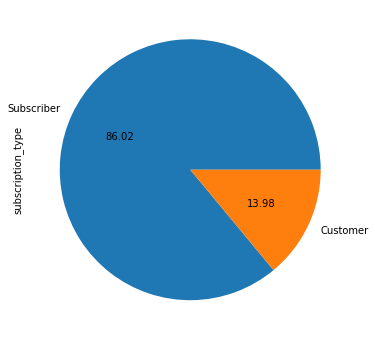

In [9]:
from_last_months = pd.to_datetime('2015-06-01')
condition = trip['start'] >= from_last_months
trip.loc[condition,'subscription_type'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6,6))
print("86% of the trips are made by users who are subscribers (use subscription plan). Last couple of months.")

The number of trips is variable through the days.
Last couple of months follow the same trends. This is important.
End of the year and early next there is a downward trend.


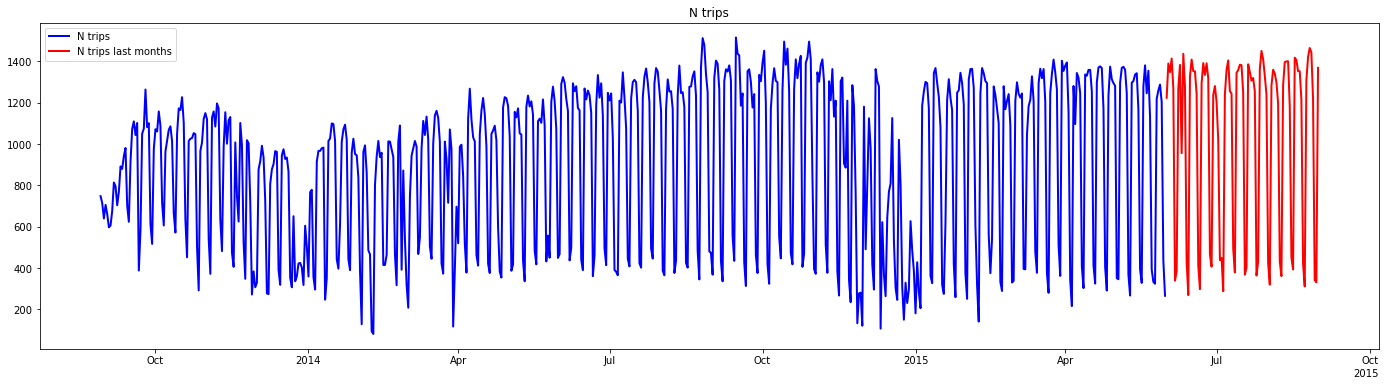

In [10]:
group = trip.groupby('start').count()
condition = (group.index >= from_last_months)
fig, ax = plt.subplots(figsize=(24,6))
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.plot(group.index[~condition], group.id[~condition].values, color = 'blue', linewidth=2)
ax.plot(group.index[condition], group.id[condition].values, color = 'red', linewidth=2)
ax.set_title('N trips')
ax.legend(['N trips', 'N trips last months'])
print("The number of trips is variable through the days.")
print("Last couple of months follow the same trends. This is important.")
print("End of the year and early next there is a downward trend.")

In [11]:
group = trip.groupby(['start','subscription_type']).size().unstack(level=1, fill_value=0)

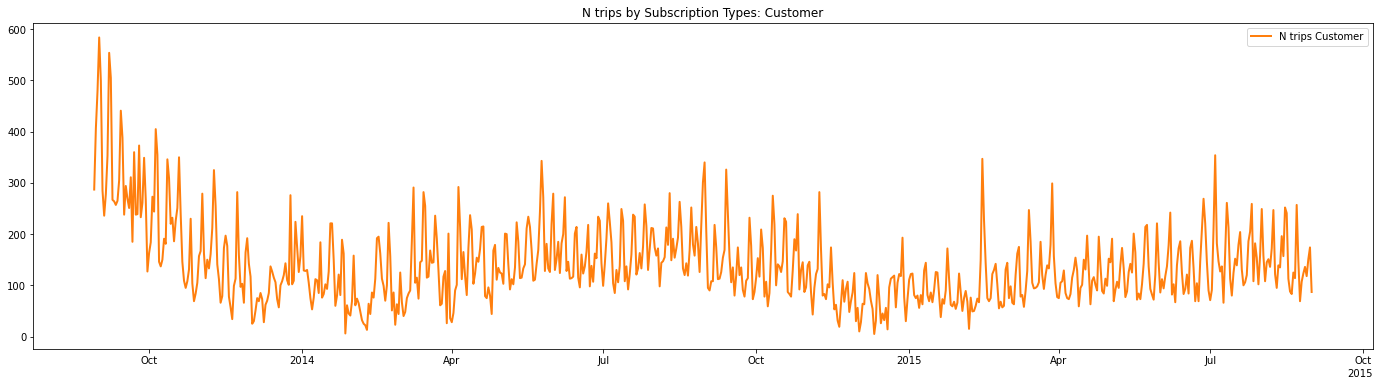

In [12]:
fig, ax = plt.subplots(figsize=(24,6))
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.plot(group.index, group['Customer'].values, color = '#ff7f0e', linewidth=2)
ax.set_title('N trips by Subscription Types: Customer')
ax.legend(['N trips Customer'])

Average number of trips per day 773
Average number of trips per day (Last couple of months) 900


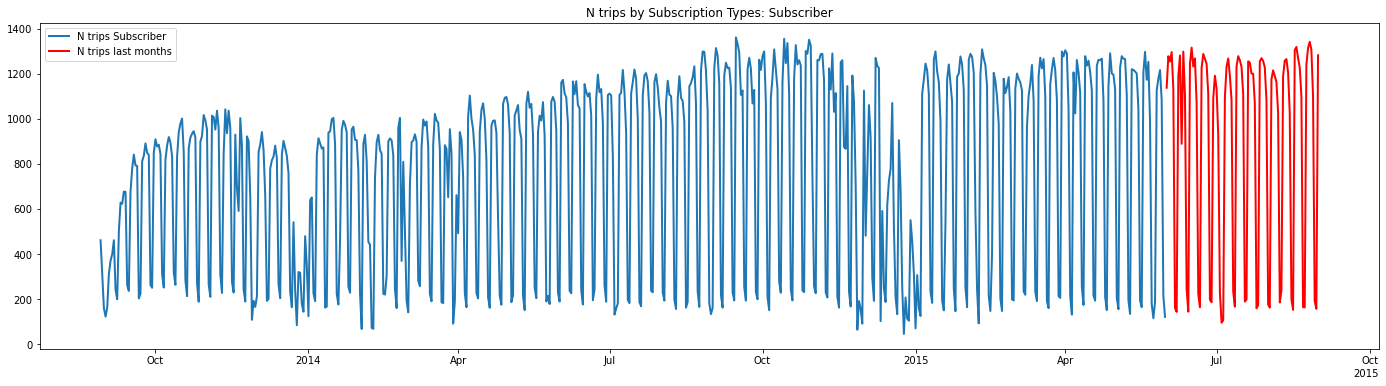

In [13]:
fig, ax = plt.subplots(figsize=(24,6))
condition = (group.index >= from_last_months)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.plot(group.index[~condition], group['Subscriber'][~condition].values, color='#1f77b4', linewidth=2)
ax.plot(group.index[condition], group['Subscriber'][condition].values, color='red', linewidth=2)
ax.set_title('N trips by Subscription Types: Subscriber')
ax.legend(['N trips Subscriber', 'N trips last months'])
avg = int(group['Subscriber'].values.sum()/len(group.index))
print('Average number of trips per day', avg)
avg = int(group['Subscriber'][condition].values.sum()/len(group.index[condition]))
print('Average number of trips per day (Last couple of months)', avg)

Subscribers use bikes more on weekday. There is a big difference between weekday and weekend.
Average number of trips during the weekday: 105076.4
Average number of trips during the weekend: 20682.0


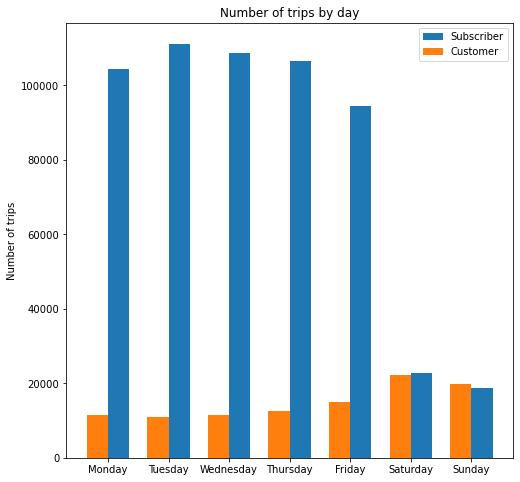

In [14]:
def get_ordered_data(group):
    values = []
    avg_weekday, avg_weekend = 0.0, 0.0
    weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    weekend = ['Saturday', 'Sunday']
    week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    for day in week:
        if day in group.index:
            values.append(group[day])
            if day in weekday:
                avg_weekday = avg_weekday + group[day]/len(weekday)
            else:
                avg_weekend = avg_weekend + group[day]/len(weekend)
        else:
            values.append(0.0)
    return week, values, avg_weekend, avg_weekday

trip['day_name'] = trip['start_date'].dt.day_name()
group = trip.groupby(['day_name', 'subscription_type']).size().unstack(level=1, fill_value=0)
days, trips_subscriber, avg_weekend, avg_weekday = get_ordered_data(group.Subscriber)
_, trips_customer, _, _ = get_ordered_data(group.Customer)
trips_subscriber
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Number of trips by day')
ax.set_ylabel('Number of trips')
x = np.arange(len(days))
width = 0.35
ax.bar(x + width/2, trips_subscriber, width, label='Subscriber',color='#1f77b4')
ax.bar(x - width/2, trips_customer, width, label='Customer',color='#ff7f0e')
ax.set_xticks(x)
ax.set_xticklabels(days)
ax.legend()
print("Subscribers use bikes more on weekday. There is a big difference between weekday and weekend.")
print("Average number of trips during the weekday:", avg_weekday)
print("Average number of trips during the weekend:", avg_weekend)

The Subscriber uses the bike in a greater proportion during rush hours.
Morning: 7:00 AM - 9:00 AM
Evening: 16:00 AM - 18:00 AM


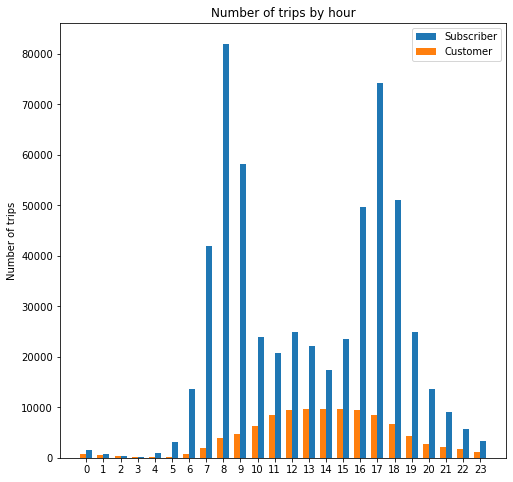

In [15]:
trip['hour'] = trip['start_date'].dt.hour
group = trip.groupby(['hour', 'subscription_type']).size().unstack(level=1, fill_value=0)
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Number of trips by hour')
ax.set_ylabel('Number of trips')
hours = group.index
x = np.arange(len(hours))
width = 0.35
ax.bar(x + width/2, group.Subscriber.values, width, label='Subscriber',color='#1f77b4')
ax.bar(x - width/2, group.Customer.values, width, label='Customer',color='#ff7f0e')
ax.set_xticks(x)
ax.set_xticklabels(hours)
ax.legend()
print("The Subscriber uses the bike in a greater proportion during rush hours.")
print("Morning: 7:00 AM - 9:00 AM")
print("Evening: 16:00 AM - 18:00 AM")

The subscripter use the bike 8.24 minutes in average.
The most frequently used range is between: [2, 15] minutes.


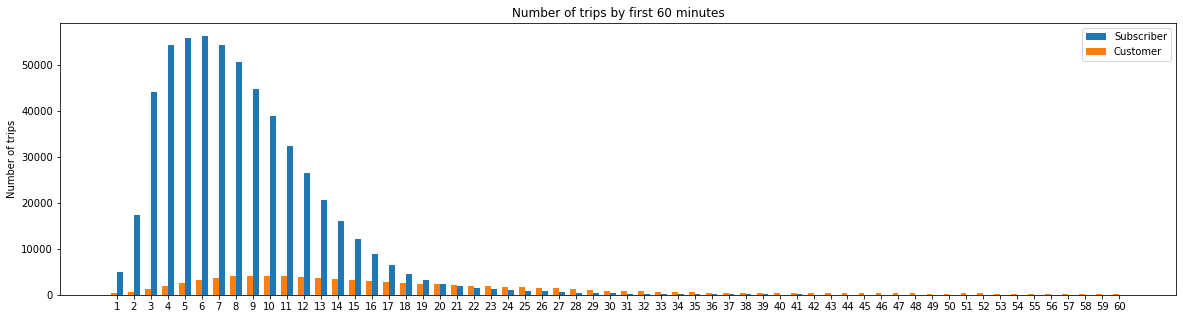

In [16]:
trip['duration_min'] = (trip['duration']/60.0).apply(np.floor).astype(int)
group = trip.groupby(['duration_min', 'subscription_type']).size().unstack(level=1, fill_value=0)
fig, ax = plt.subplots(figsize=(20,5))
condition = (group.Subscriber.index <= 60)
group.Subscriber[condition]
ax.set_title('Number of trips by first 60 minutes')
ax.set_ylabel('Number of trips')
mins = group.Subscriber[condition].index
x = np.arange(len(mins))
width = 0.35
ax.bar(x + width/2, group.Subscriber[condition].values, width, label='Subscriber',color='#1f77b4')
ax.bar(x - width/2, group.Customer[condition].values, width, label='Customer',color='#ff7f0e')
ax.set_xticks(x)
ax.set_xticklabels(mins)
ax.legend()
avg_time = (sum(group.Subscriber[condition].values*mins)/sum(group.Subscriber[condition].values))
print("The subscripter use the bike {} minutes in average.".format(round(avg_time, 2)))
print("The most frequently used range is between: [2, 15] minutes.")

The most frequent start station is:  San Francisco Caltrain (Townsend at 4th)


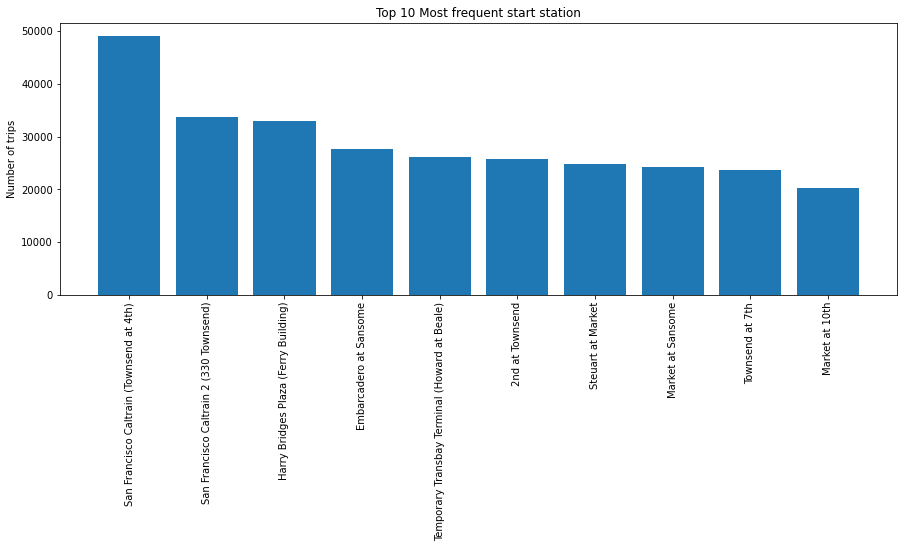

In [17]:
trip['start_station_name'] = pd.Categorical(trip['start_station_name'])
most_used = trip['start_station_name'].value_counts().nlargest(10)
fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylabel('Number of trips')
ax.set_title('Top 10 Most frequent start station')
ax.bar(most_used.index.values, most_used.values)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
print("The most frequent start station is: ", most_used.index.values[0])

The most frequent end station is:  San Francisco Caltrain (Townsend at 4th)


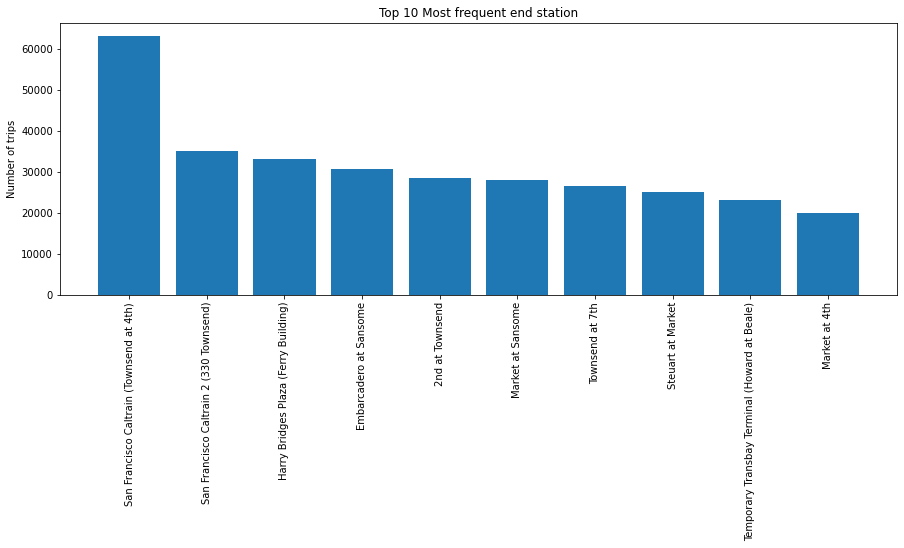

In [18]:
trip['end_station_name'] = pd.Categorical(trip['end_station_name'])
most_used = trip['end_station_name'].value_counts().nlargest(10)
fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylabel('Number of trips')
ax.set_title('Top 10 Most frequent end station')
ax.bar(most_used.index.values, most_used.values)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
most_used.index.values[0]
print("The most frequent end station is: ", most_used.index.values[0])

In [19]:
group = trip.groupby(['start_station_name', 'end_station_name']).size().unstack(level=1, fill_value=0)
cond = (group.index == group.max(axis=1).nlargest(1).index[0])
most_start_station = group.max(axis=1).nlargest(1).index[0]
most_end_station = group[cond].max().nlargest(1)
print('Trip start-end most used:', most_start_station,'-->', most_end_station.index[0],', N Trips = ', most_end_station.values[0])

Trip start-end most used: San Francisco Caltrain 2 (330 Townsend) --> Townsend at 7th , N Trips =  6216


Some bikes are used in greater frequency.


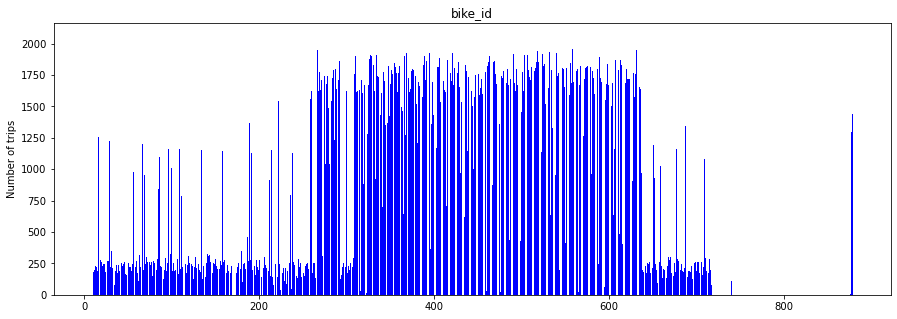

In [20]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylabel('Number of trips')
ax.set_title('bike_id')
most_used = trip['bike_id'].value_counts()
ax.bar(most_used.index.values, most_used.values, color='blue')
print("Some bikes are used in greater frequency.")